In [ ]:
!pip install spotipy --quiet

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as st
import os

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.exceptions import SpotifyException

client_id = 'e7ea4d9a3158410c99bfc1d6adb0bd48'
client_secret = '511714788e874b6f9bfbf0c9709c938a'


# Authenticate with Spotify API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Test
result = sp.search(q='breath away', type='track', limit=1)
print(result)

{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=1&query=breath%20away&type=track', 'limit': 1, 'next': 'https://api.spotify.com/v1/search?offset=1&limit=1&query=breath%20away&type=track', 'offset': 0, 'previous': None, 'total': 900, 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0PCCGZ0wGLizHt2KZ7hhA2'}, 'href': 'https://api.spotify.com/v1/artists/0PCCGZ0wGLizHt2KZ7hhA2', 'id': '0PCCGZ0wGLizHt2KZ7hhA2', 'name': 'Artemas', 'type': 'artist', 'uri': 'spotify:artist:0PCCGZ0wGLizHt2KZ7hhA2'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 

In [3]:
os.environ['MallocStackLogging']='0'

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the dataset as a pandas DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "iamsumat/spotify-top-2000s-mega-dataset",
    "Spotify-2000.csv",  # Replace with the correct file name from the dataset
)

# Display the first 5 records
print("First 5 records:")
df.head()

/var/folders/3s/2dmkjq450zz_66pdw012m6ch0000gn/T/ipykernel_32996/309881233.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [6]:
df.index = df['Index']
df = df.drop(columns='Index')
df.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [7]:
df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [8]:
df.describe(include='object')

,Title,Artist,Top Genre,Length (Duration)
count,1994,1994,1994,1994
unique,1958,731,149,350
top,One,Queen,album rock,215
freq,3,37,413,23


Length (Duration) needs to be typed as an int. There are 149 unique values for 'Top Genre', 731 unique values for 'Artist', and 1958 unique values for 'Title'. Since we're exploring the statistics and data for unique genres we should limit the genres to the most popular genres or provide widgets that can toggle the number of genres.

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [12]:
df.sample(10, random_state=42)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
890,Time In A Bottle,Jim Croce,adult standards,1972,134,26,54,-12,15,64,148,85,3,58
1673,Ik Leef Niet Meer Voor Jou,Marco Borsato,dutch cabaret,1995,150,82,55,-9,4,57,217,2,5,60
415,A Night Like This,Caro Emerald,dutch pop,2010,123,71,87,-6,10,96,226,57,4,40
1600,Rhythm Is A Dancer,SNAP!,diva house,1992,124,65,76,-15,9,86,332,21,3,57
850,Wild Horses,The Rolling Stones,album rock,1971,140,39,43,-7,8,16,342,69,3,72
1659,Streets of Philadelphia - Single Edit,Bruce Springsteen,classic rock,1995,94,29,74,-13,9,44,195,29,3,70
927,Tequila Sunrise - 2013 Remaster,Eagles,album rock,1973,111,40,63,-13,11,73,173,54,3,62
1671,Lemon Tree,Fools Garden,german pop rock,1995,143,48,66,-9,12,64,191,64,4,73
1449,Ich bin wie du,Marianne Rosenberg,classic schlager,1988,129,74,48,-10,5,60,218,1,8,45


In [13]:
df['Length (Duration)'].unique()

array(['201', '207', '341', '269', '256', '247', '257', '366', '223',
       '290', '162', '232', '214', '639', '173', '236', '288', '276',
       '352', '296', '218', '176', '197', '261', '270', '298', '259',
       '306', '310', '211', '186', '185', '264', '202', '263', '266',
       '629', '177', '237', '278', '331', '355', '213', '234', '216',
       '275', '467', '243', '219', '305', '215', '144', '195', '240',
       '357', '297', '281', '273', '212', '279', '249', '229', '394',
       '375', '226', '210', '258', '283', '231', '268', '403', '321',
       '217', '308', '206', '208', '242', '326', '199', '225', '193',
       '302', '294', '238', '433', '324', '154', '245', '248', '311',
       '272', '289', '253', '181', '184', '203', '280', '146', '196',
       '204', '602', '353', '189', '423', '233', '135', '141', '241',
       '262', '346', '319', '284', '501', '287', '170', '187', '171',
       '414', '252', '209', '364', '246', '235', '161', '274', '286',
       '172', '404',

In [14]:
pd.to_numeric(df['Length (Duration)'], errors='coerce').isna().sum()

4

When these strings are forced into numeric types, four NaNs result from that method.

In [16]:
df['Length (Duration)'] = df['Length (Duration)'].str.replace(',','')

In [17]:
df['Length (Duration)'].unique()

array(['201', '207', '341', '269', '256', '247', '257', '366', '223',
       '290', '162', '232', '214', '639', '173', '236', '288', '276',
       '352', '296', '218', '176', '197', '261', '270', '298', '259',
       '306', '310', '211', '186', '185', '264', '202', '263', '266',
       '629', '177', '237', '278', '331', '355', '213', '234', '216',
       '275', '467', '243', '219', '305', '215', '144', '195', '240',
       '357', '297', '281', '273', '212', '279', '249', '229', '394',
       '375', '226', '210', '258', '283', '231', '268', '403', '321',
       '217', '308', '206', '208', '242', '326', '199', '225', '193',
       '302', '294', '238', '433', '324', '154', '245', '248', '311',
       '272', '289', '253', '181', '184', '203', '280', '146', '196',
       '204', '602', '353', '189', '423', '233', '135', '141', '241',
       '262', '346', '319', '284', '501', '287', '170', '187', '171',
       '414', '252', '209', '364', '246', '235', '161', '274', '286',
       '172', '404',

In [18]:
pd.to_numeric(df['Length (Duration)'], errors='raise')

Index
1       201
2       207
3       341
4       269
5       256
       ... 
1990    128
1991    136
1992    162
1993    324
1994    148
Name: Length (Duration), Length: 1994, dtype: int64

In [19]:
print(df['Length (Duration)'].sort_values(ascending=False).values, end=' ')

['966' '93' '859' ... '1121' '108' '102'] 

In [20]:
df['Length (Duration)'].dtype

dtype('O')

In [21]:
df.loc[1050,'Length (Duration)']

'93'

In [22]:
np.array_equal(df['Length (Duration)'].astype(int), pd.to_numeric(df['Length (Duration)'], errors='raise'))

True

In [23]:
pd.to_numeric(df['Length (Duration)'], errors='raise').astype(str).eq(df['Length (Duration)']).all()

True

In [24]:
df['Length (Duration)'] = pd.to_numeric(df['Length (Duration)'], errors='coerce')

In [25]:
df['Length (Duration)'].isna().sum()

0

## EDA

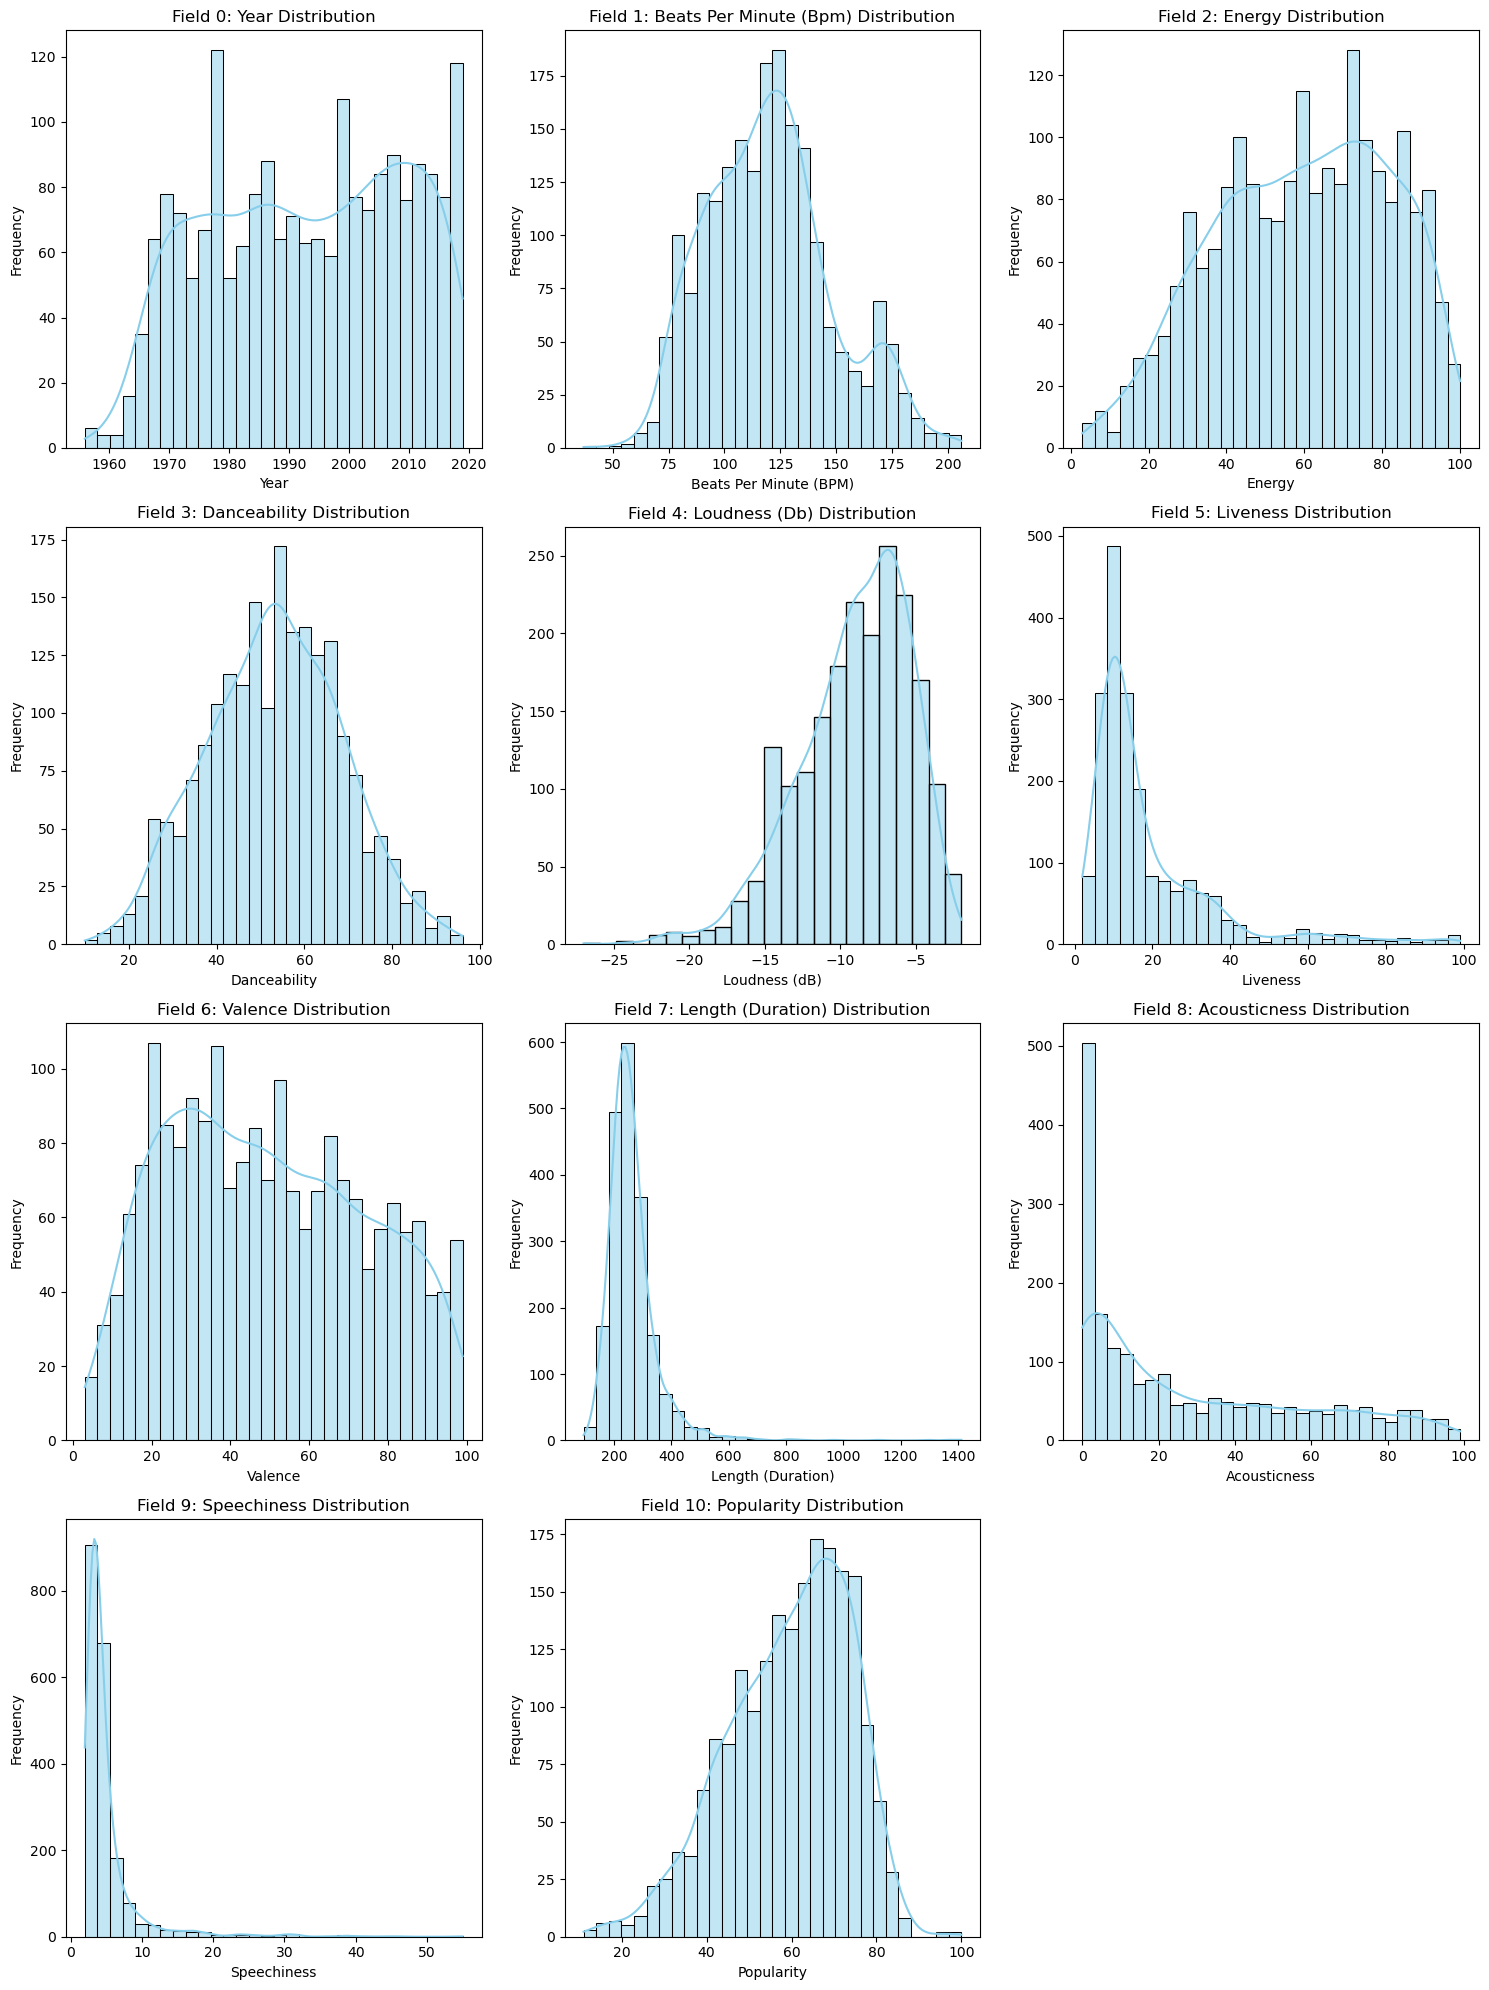

In [27]:
# Get all numeric column names
numeric_columns = df.select_dtypes(include=['number']).columns  # Select only numeric columns

# Set up the number of rows and columns for subplots
n = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate the number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate
i = 0 

# Plot a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    bins = 30
    if df[col].unique().sum() < bins and df[col].nunique() >= 1:
        bins = df[col].nunique()
    sns.histplot(df[col], kde=True, ax=axes[i], bins=bins, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Field {i}: {col.title()} Distribution')

# Hide any extra subplots if the numeric columns are not divisible by three.
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to ensure there's no overlap
plt.tight_layout()

# Show the figure
plt.show()

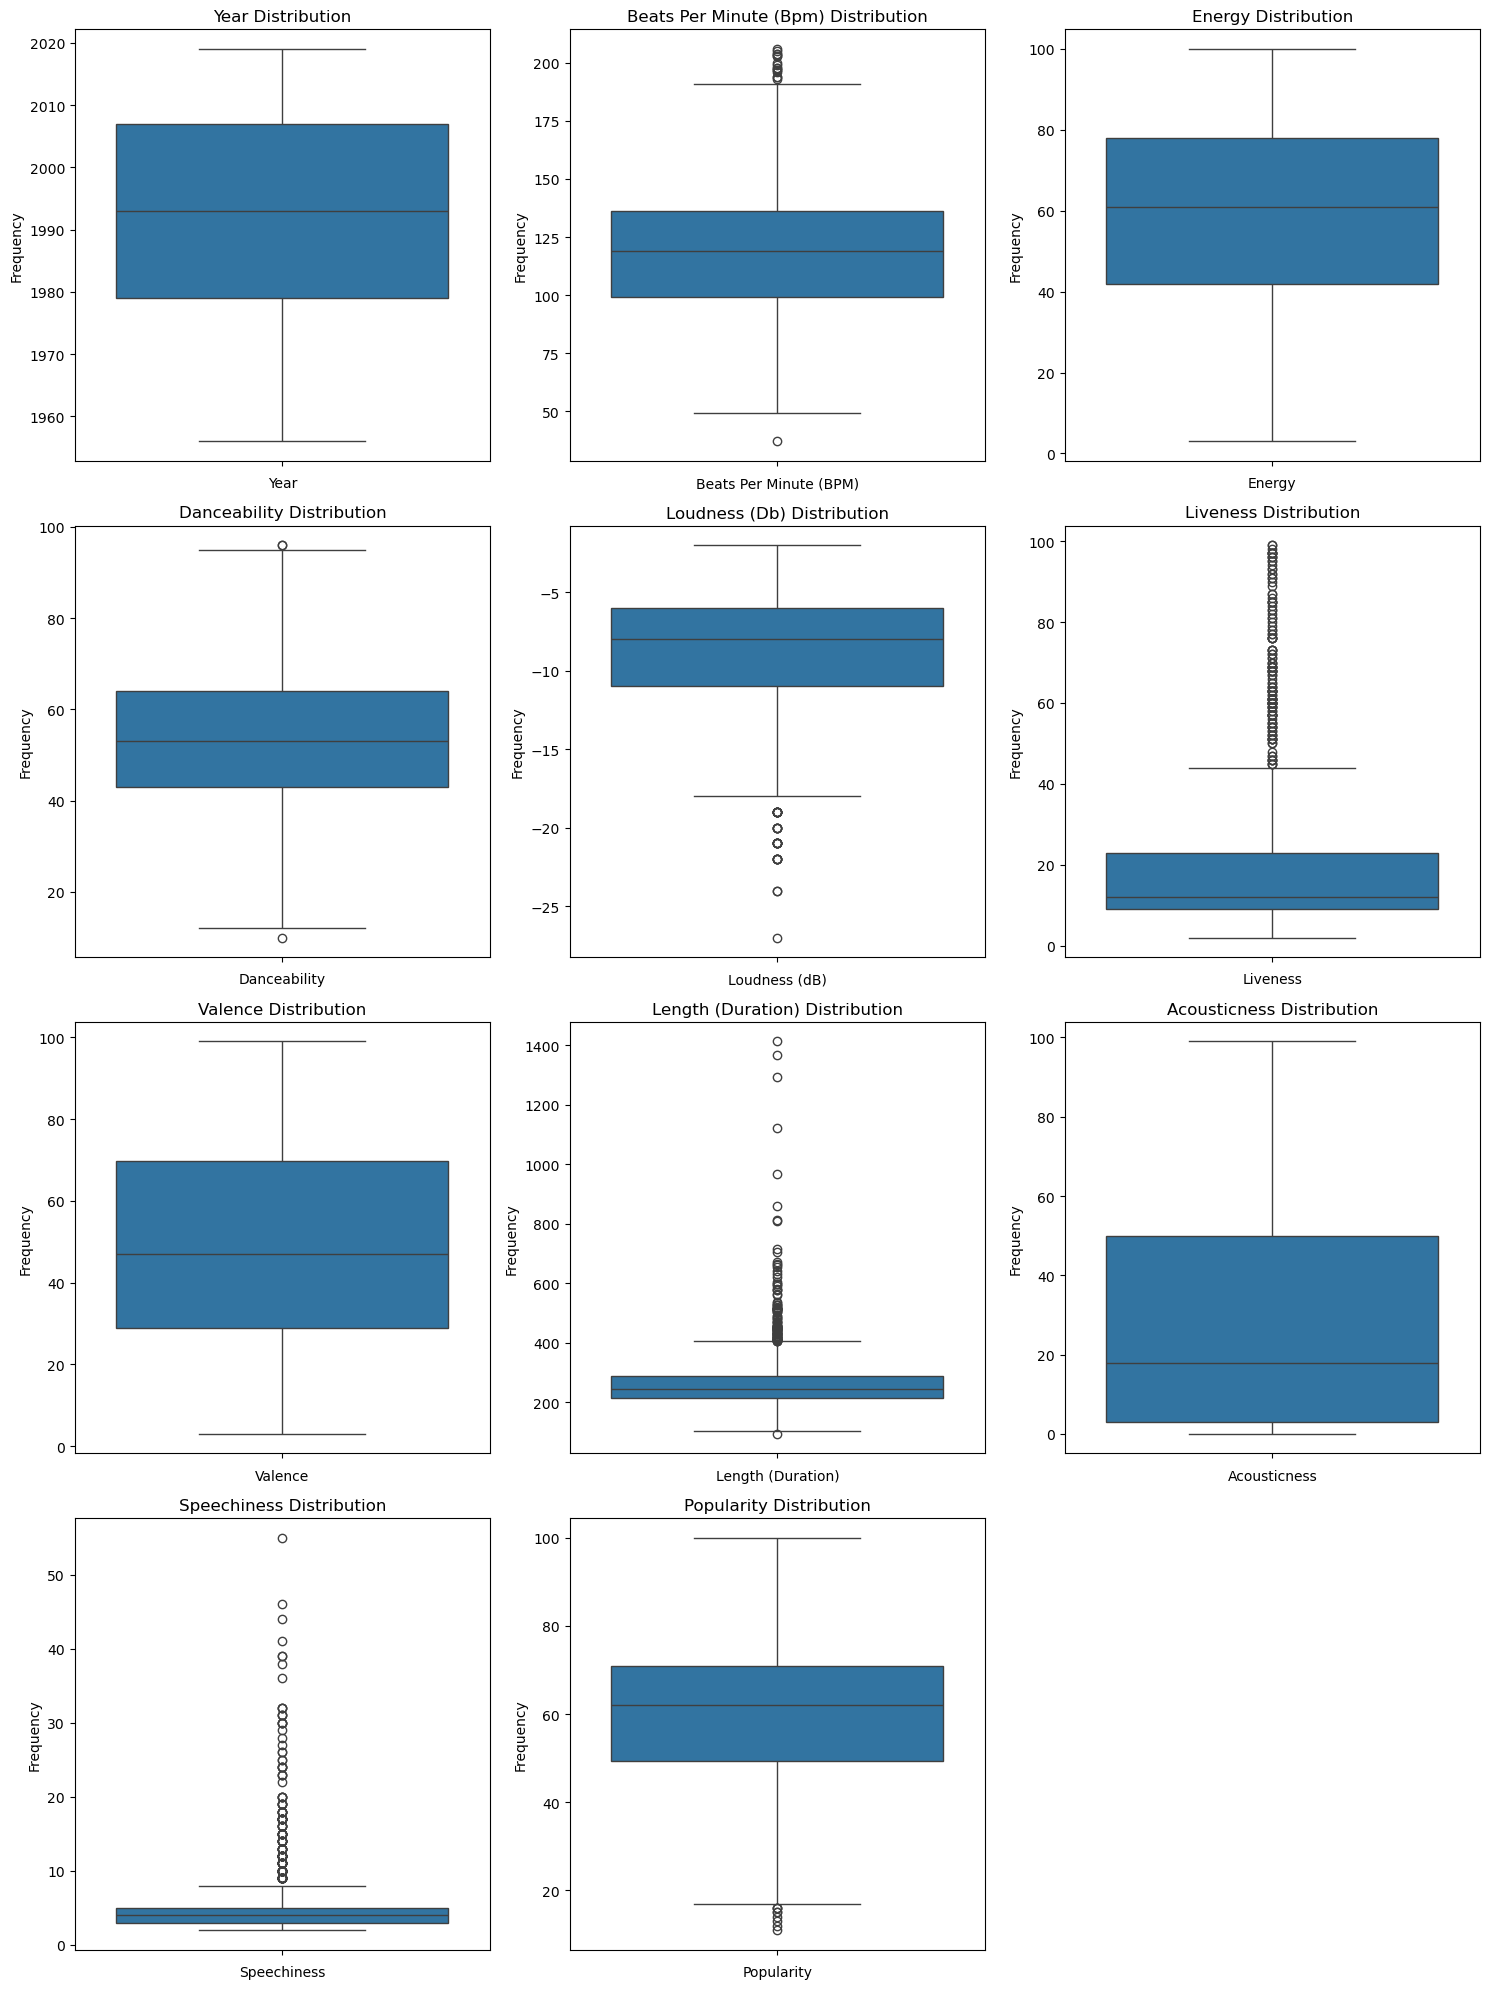

In [28]:
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

# Set up the number of rows and columns for subplots
n = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate the number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot a boxplot for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(df[col], ax=axes[i], patch_artist=True)  # Specify ax for each boxplot
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col.title()} Distribution')
    
# Hide any extra subplots if the numeric columns are not divisible by three.
for j in range(i + 1, len(axes)):
   axes[j].axis('off')

# Adjust the layout to ensure there's no overlap
plt.tight_layout()

# Show the figure
plt.show()

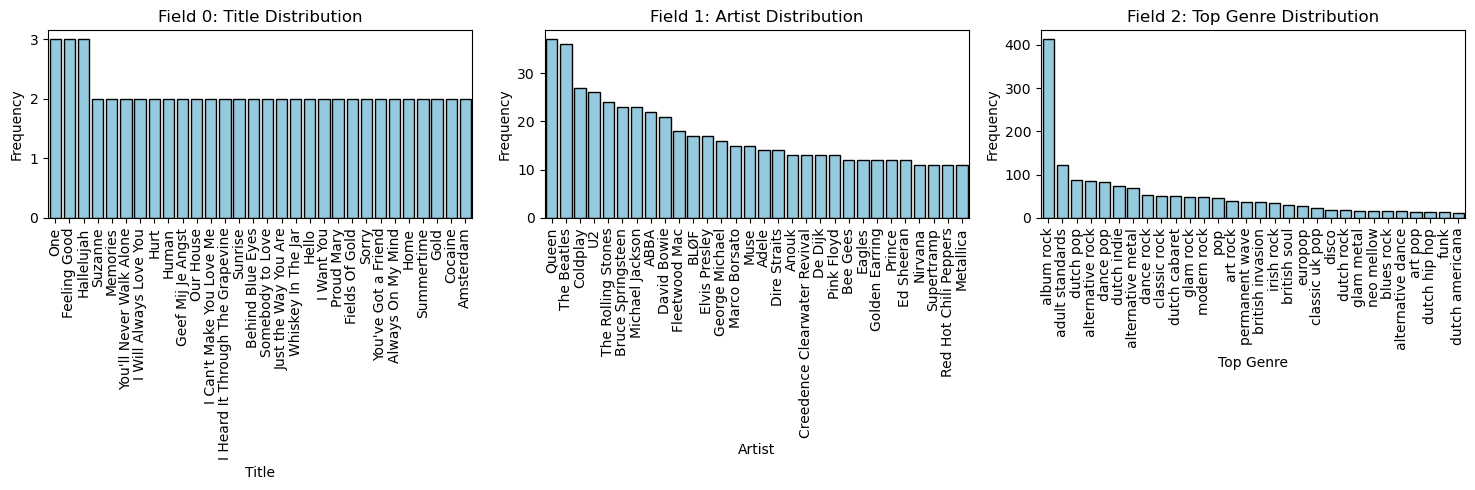

In [29]:
# We do not want to plot endless or referencial text like links.
top_n = 30  # Top N values to display

# Get object columns only from the selected ones
object_columns = df.select_dtypes(include=['object']).columns  # Select only object columns

# Set up the number of rows and columns for subplots
n = len(object_columns)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plot count plots for each object column
for i, col in enumerate(object_columns):
    top_values = df[col].value_counts(ascending=False).nlargest(top_n).index
    filtered_df = df[df[col].isin(top_values)].sort_values(col, ascending=False)
    
    sns.countplot(data=filtered_df, x=col, ax=axes[i], color='skyblue', edgecolor='black', order=top_values)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Field {i}: {col.title()} Distribution')
    axes[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [85]:
len(df.columns)

14

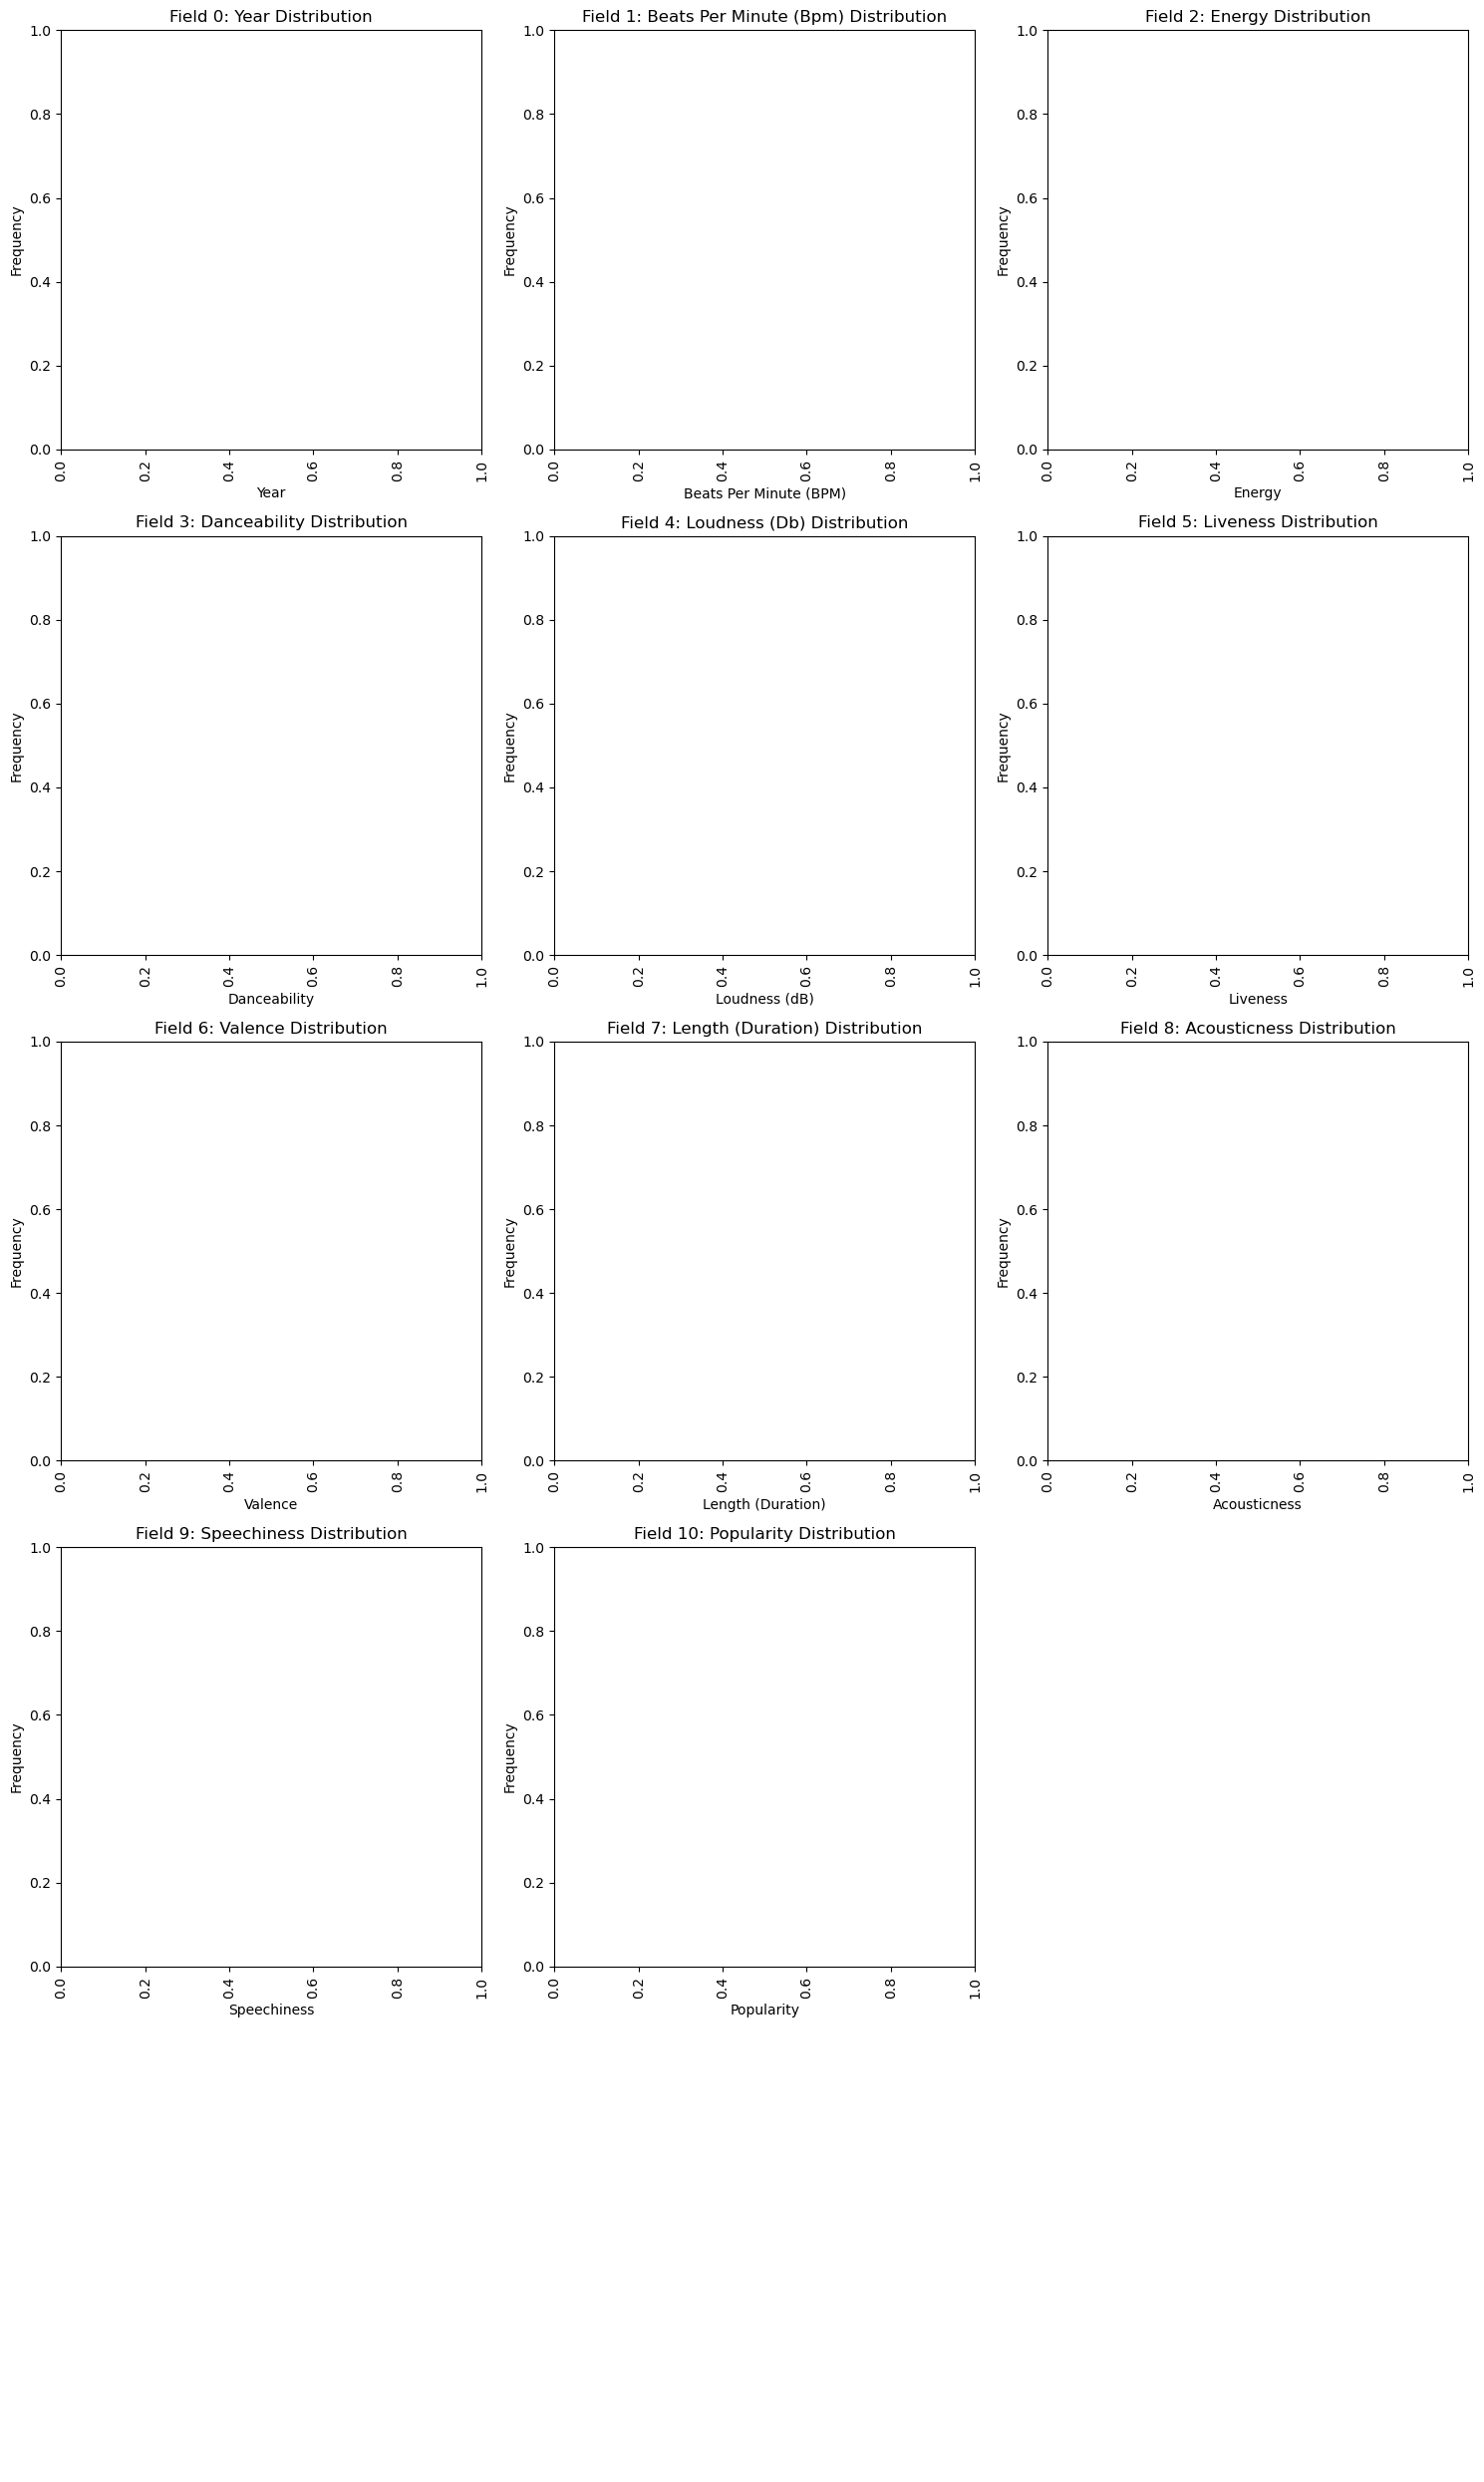

In [93]:
n = len(object_columns)
cols = 3
rows = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Field {i}: {col.title()} Distribution')
    axes[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

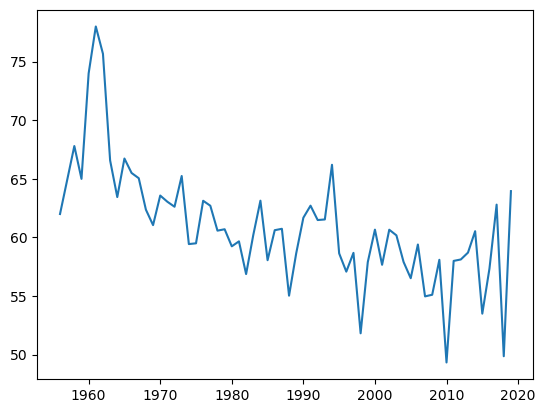

In [73]:
plt.plot(df.groupby('Year')['Popularity'].mean())

In [30]:
df['Top Genre'].value_counts(ascending=False).nlargest(top_n)

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
glam rock             49
modern rock           49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
disco                 18
dutch rock            18
glam metal            17
neo mellow            17
blues rock            15
alternative dance     15
art pop               14
dutch hip hop         13
funk                  13
dutch americana       12
Name: count, dtype: int64

In [31]:
df[numeric_columns].head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,
1,2004,157,30,53,-14,11,68,201,94,3,71
2,2000,135,79,50,-11,17,81,207,17,7,39
3,2001,168,69,66,-9,7,52,341,2,17,69
4,2007,173,96,43,-4,3,37,269,0,4,76
5,2002,106,82,58,-5,10,87,256,1,3,59


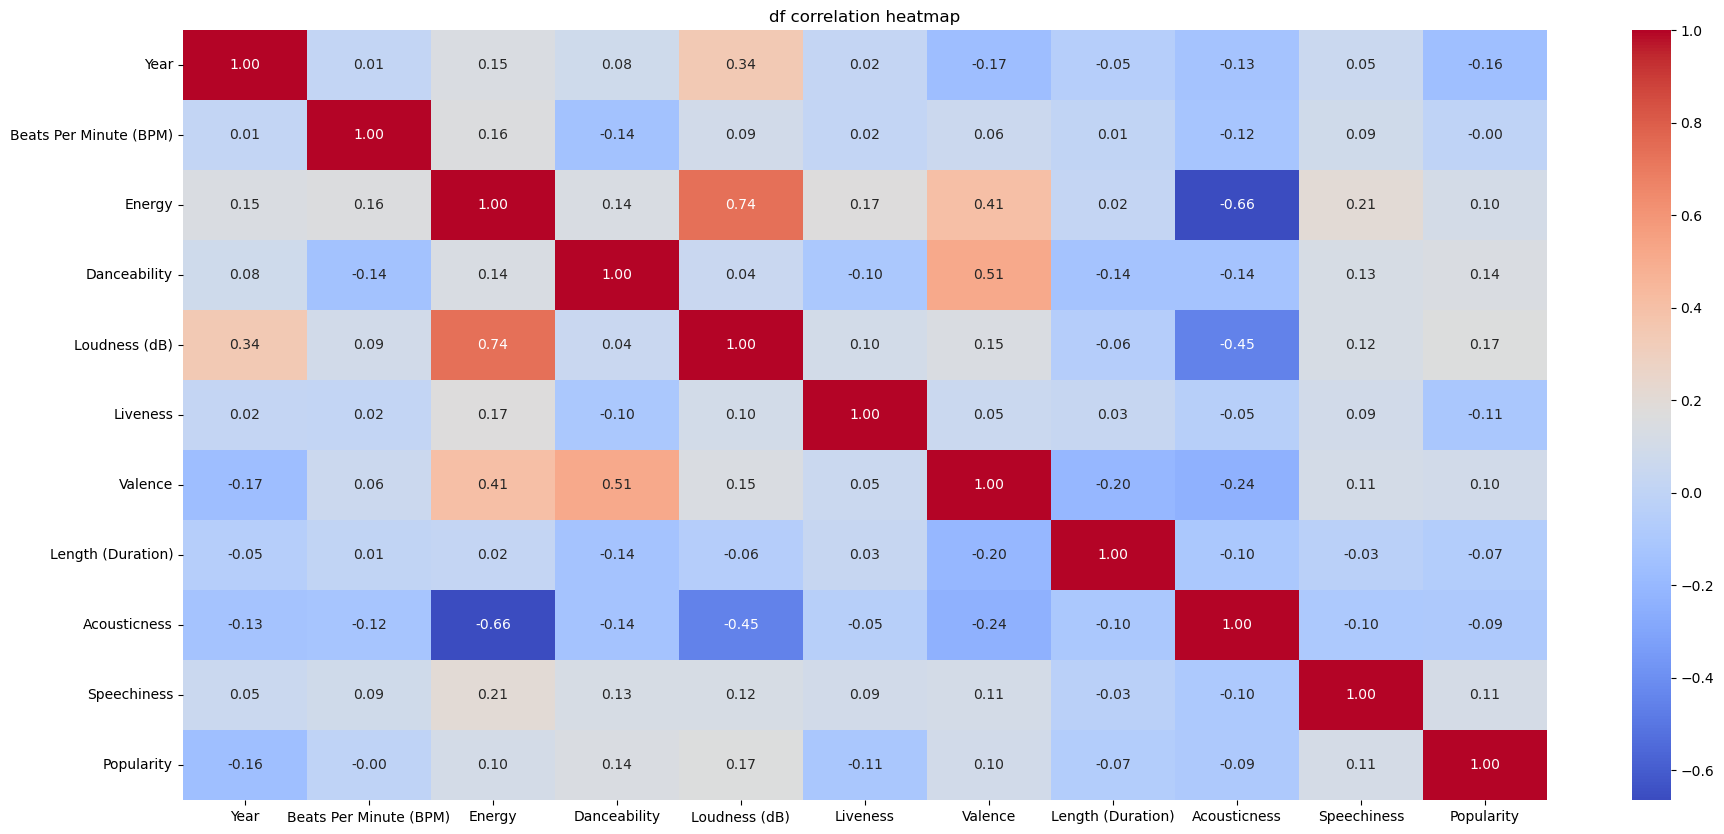

In [32]:
plt.figure(figsize=(22, 10))
plt.title('df correlation heatmap')
sns.heatmap(df[numeric_columns][1:].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.show()

Most fields are not correlated to each other. The most correlated fields are 'Loudness (dB)' & 'Energy' and 'Acousticness' & 'Energy' and they have moderate correlations, not strong.

In [34]:
df['Top Genre'].value_counts(ascending=False).index[0]

'album rock'

In [35]:
df.loc[df['Top Genre']==df['Top Genre'].value_counts(ascending=False).index[0], ]

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
14,I'm going home,Ten Years After,album rock,2005,117,93,38,-2,81,40,639,18,10,26
32,Big Log - 2006 Remaster,Robert Plant,album rock,2007,181,59,56,-9,20,68,306,32,3,57
60,Goin To The Run,Golden Earring,album rock,2008,124,59,47,-8,28,18,236,42,3,38
68,In The Army Now,Status Quo,album rock,2002,105,73,68,-8,14,94,281,11,2,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,Down On The Corner,Creedence Clearwater Revival,album rock,1969,108,54,86,-9,7,87,166,58,8,73
1980,Touch Me,The Doors,album rock,1969,109,90,43,-5,12,77,190,41,7,68
1982,Midnight Rambler,The Rolling Stones,album rock,1969,75,66,40,-10,17,51,413,77,12,50


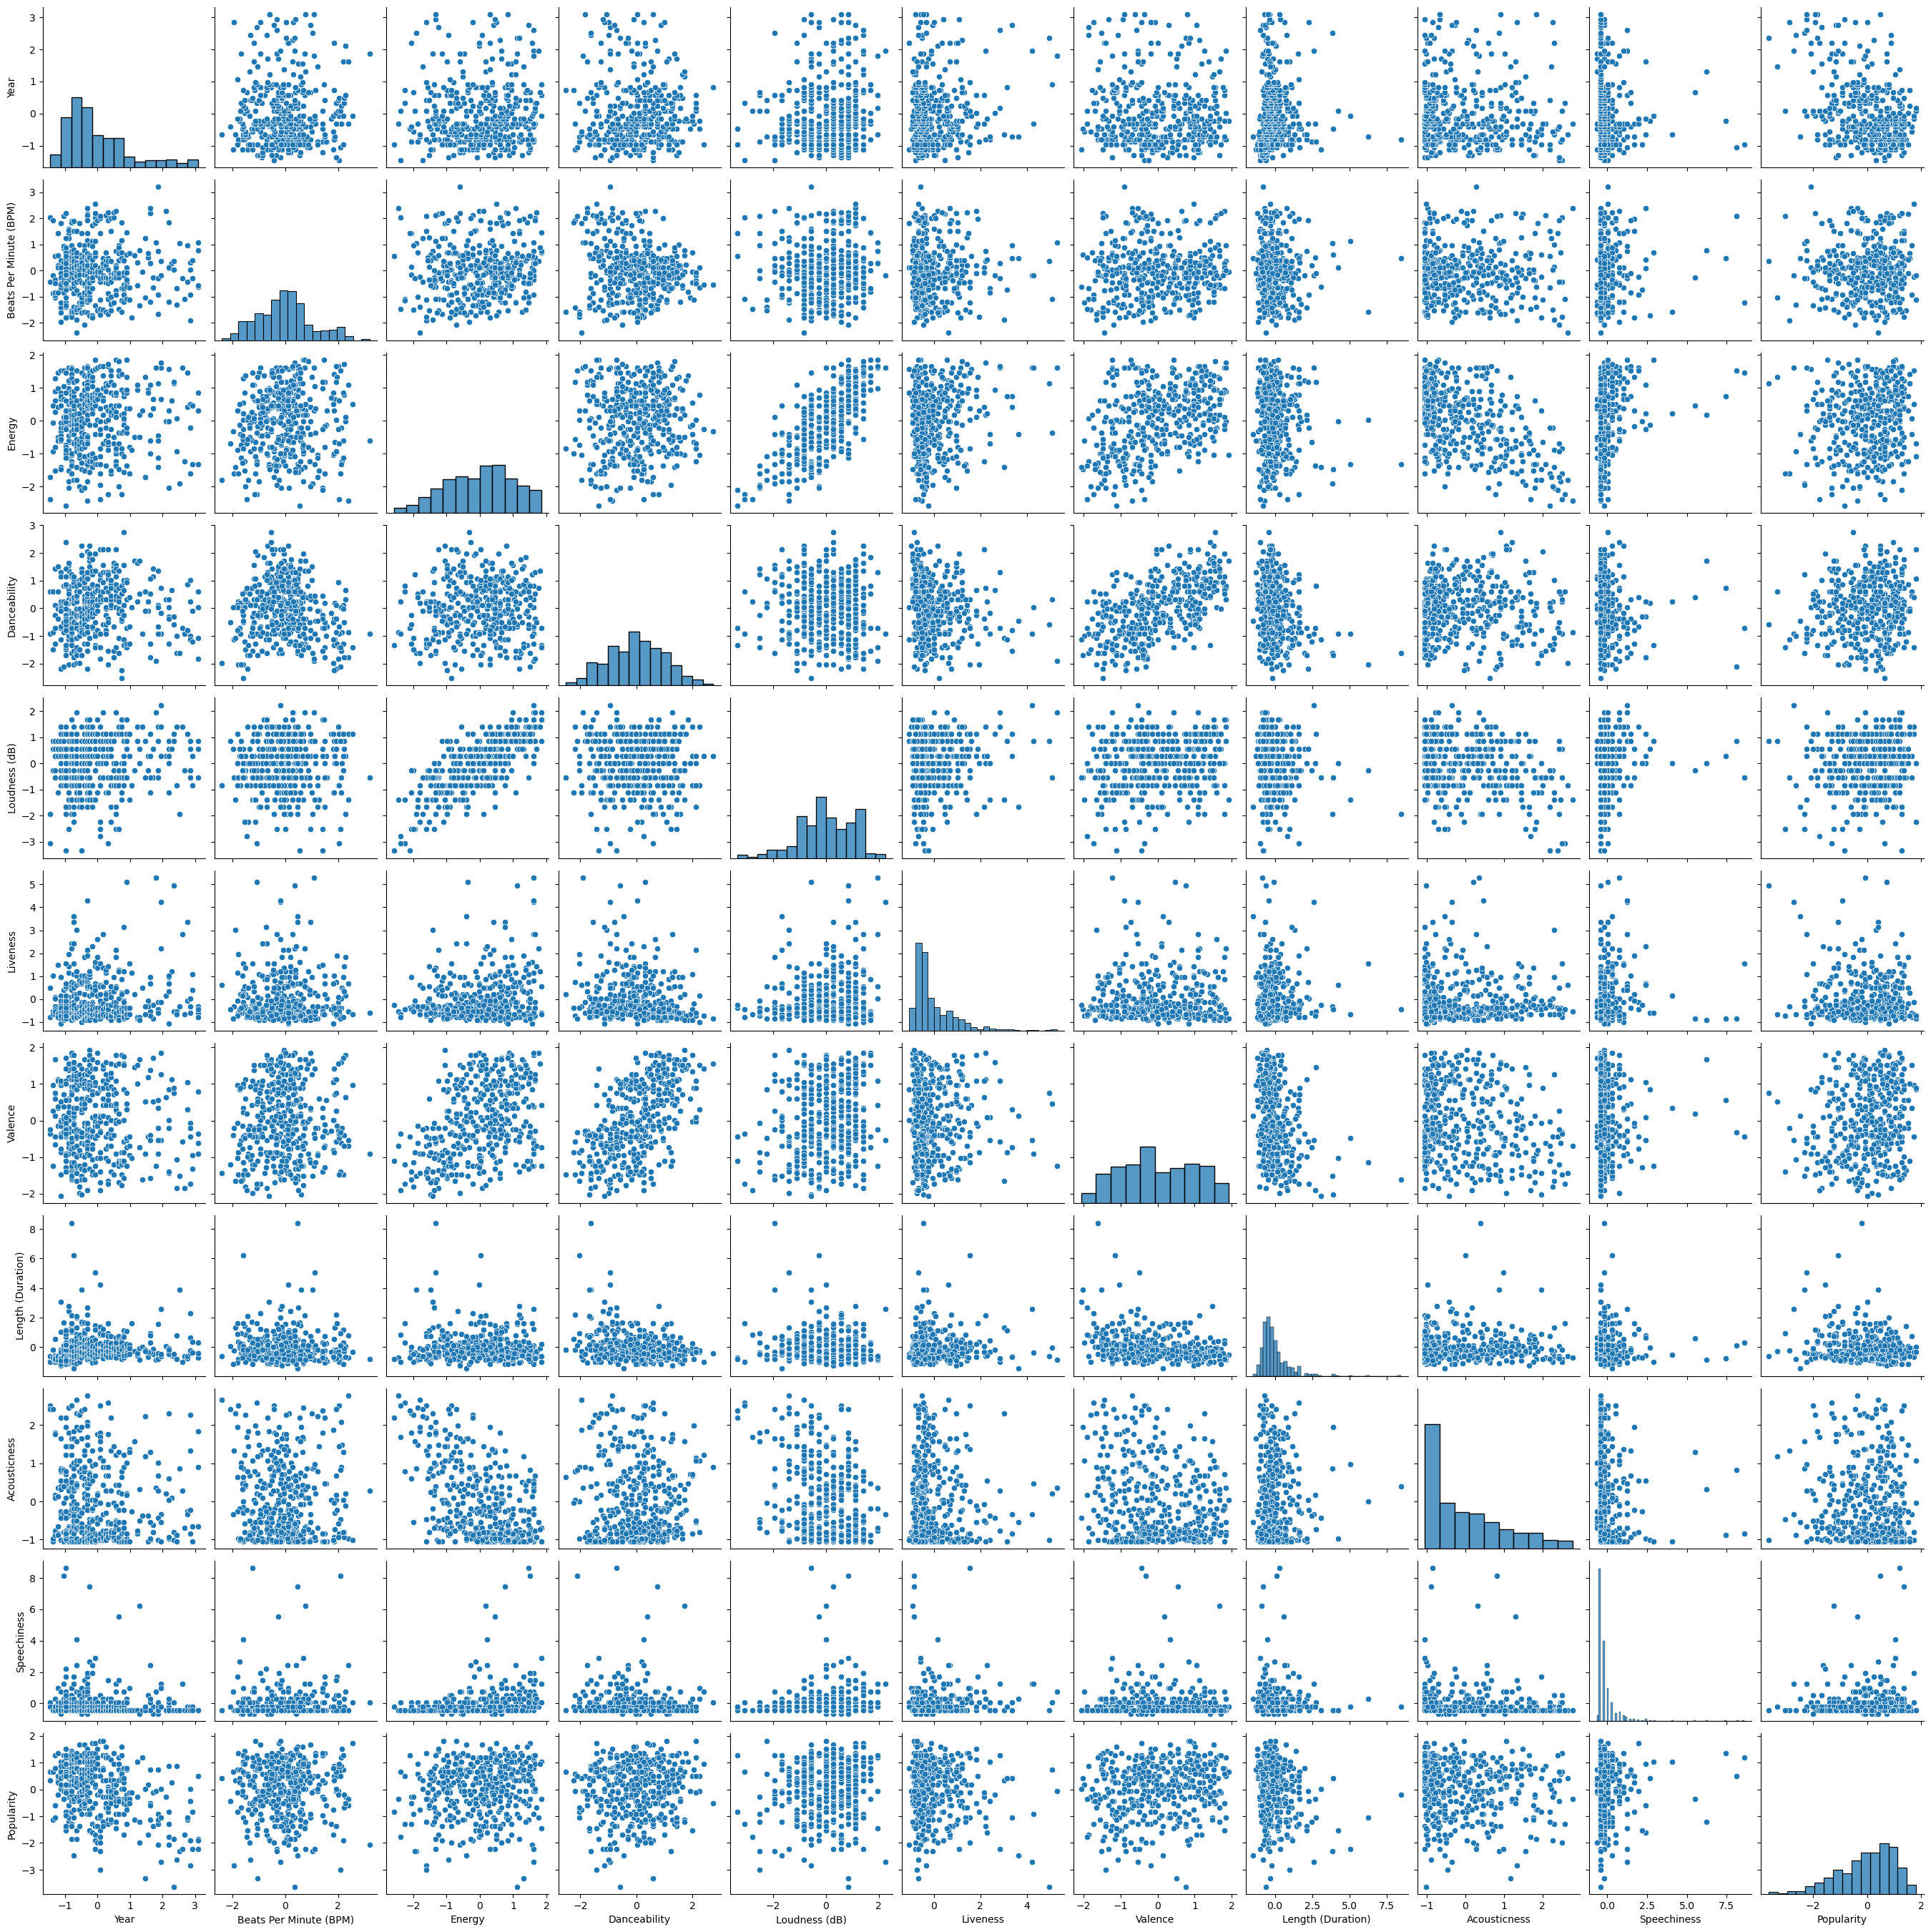

In [36]:
from sklearn.preprocessing import StandardScaler

original_df = df.copy()

# Example
# scaled_df = pd.DataFrame(StandardScaler().fit_transform(df[numeric_columns]), columns=numeric_columns)
subset = df.loc[df['Top Genre']==df['Top Genre'].value_counts(ascending=False).index[0], ]
scaled_df = pd.DataFrame(StandardScaler().fit_transform(subset[numeric_columns]), columns=numeric_columns)
sns.pairplot(scaled_df, kind='scatter')
plt.show()